In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Conv2D,Flatten, Activation, MaxPooling2D

In [2]:
def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion_matrix",cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation="nearest",cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm=cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
    cm = cm.round(decimals=4)
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix,without normalization")
  print(cm)

  thresh = cm.max() /2.
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],
                    horizontalalignment="center",
                    color="white" if cm[i,j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.savefig("matrix.png")

In [3]:
data = np.load("data_train.pkl",allow_pickle=True,encoding='latin1')
print(data.keys())

FileNotFoundError: [Errno 2] No such file or directory: 'data_train.pkl'

In [4]:
print("shape original:",data['sci_images'].shape)
imagenes_1 = data['sci_images'].reshape(-1,21,21,1)
imagenes_2 = data['temp_images'].reshape(-1,21,21,1)
imagenes_3 = data['SNR_images'].reshape(-1,21,21,1)
imagenes_4 = data['diff_images'].reshape(-1,21,21,1)

images = np.concatenate((imagenes_1,imagenes_2,imagenes_3, imagenes_4), axis=3)
print("shape nueva:",images.shape)

y = data['labels'].reshape(-1,1)
ohe = OneHotEncoder(sparse=False)
y = ohe.fit_transform(y)
y


shape original: (4026, 441)
shape nueva: (4026, 21, 21, 4)


array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [5]:
X_train, X_val, y_train, y_val = train_test_split(images, y, test_size=0.33, random_state=42)
print("X_train shape:",X_train.shape)
print("X_val shape:",X_val.shape)
print("y_train shape:",y_train.shape)
print("y_val shape:",y_val.shape)

X_train shape: (2697, 21, 21, 4)
X_val shape: (1329, 21, 21, 4)
y_train shape: (2697, 2)
y_val shape: (1329, 2)


### Modelo

In [6]:

model = Sequential()
model.add(Conv2D(32,kernel_size = 2,input_shape = (21,21,4),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,kernel_size = 2,input_shape = (21,21,4), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,kernel_size = 2,input_shape = (21,21,4), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,kernel_size = 2,input_shape = (21,21,4), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(units= 64,activation='sigmoid'))
model.add(Dense(units= 64,activation='sigmoid'))
model.add(Dense(units= 64,activation='sigmoid'))
model.add(Dense(units = 2,activation = 'softmax'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(x = X_train , y = y_train, batch_size = 50, epochs = 15, validation_data = (X_val,y_val))

Epoch 1/15
54/54 [==============================] - 2s 14ms/step - loss: 0.4343 - accuracy: 0.8754 - val_loss: 0.2643 - val_accuracy: 0.9157
Epoch 2/15
54/54 [==============================] - 1s 11ms/step - loss: 0.1339 - accuracy: 0.9692 - val_loss: 0.1163 - val_accuracy: 0.9699
Epoch 3/15
54/54 [==============================] - 1s 12ms/step - loss: 0.0936 - accuracy: 0.9766 - val_loss: 0.0921 - val_accuracy: 0.9767
Epoch 4/15
54/54 [==============================] - 1s 10ms/step - loss: 0.0788 - accuracy: 0.9792 - val_loss: 0.1061 - val_accuracy: 0.9722
Epoch 5/15
54/54 [==============================] - 1s 11ms/step - loss: 0.0726 - accuracy: 0.9815 - val_loss: 0.1148 - val_accuracy: 0.9646
Epoch 6/15
54/54 [==============================] - 1s 12ms/step - loss: 0.0682 - accuracy: 0.9826 - val_loss: 0.1523 - val_accuracy: 0.9541
Epoch 7/15
54/54 [==============================] - 1s 12ms/step - loss: 0.0611 - accuracy: 0.9829 - val_loss: 0.0838 - val_accuracy: 0.9774
Epoch 8/15
54

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 32)        544       
                                                                 
 activation (Activation)     (None, 21, 21, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        4128      
                                                                 
 activation_1 (Activation)   (None, 10, 10, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                    

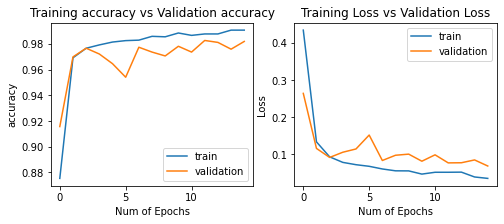

In [8]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.xlabel("Num of Epochs")  
plt.ylabel("accuracy")  
plt.title("Training accuracy vs Validation accuracy")  
plt.legend(['train','validation'])

plt.subplot(1,2,2) 
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])
plt.savefig('accuracy.pdf')

###Metricas

In [9]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score

y_test = model.predict(X_val)
y_test = np.argmax(y_test,-1)
y_pred = y_val
y_pred = np.argmax(y_pred,-1)

print("accuracy: ", accuracy_score(y_test, y_pred))
print("precision: ", precision_score(y_test, y_pred, average = 'macro'))
print("recall: ", recall_score(y_test, y_pred, average = 'macro'))
print("f1: ", f1_score(y_test, y_pred, average = 'macro'))

accuracy:  0.981941309255079
precision:  0.9819276153375762
recall:  0.981955995868667
f1:  0.9819395811722285


Confusion matrix,without normalization
[[646  11]
 [ 13 659]]


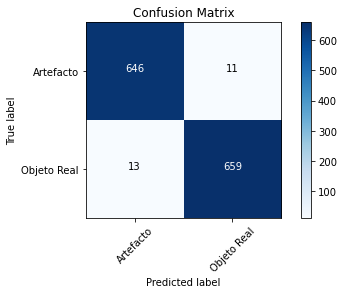

In [10]:
#Confusion Matrix
cm_plot_labels = ["Artefacto","Objeto Real"]
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title="Confusion Matrix")
plt.savefig('confusion.pdf')

Normalized confusion matrix
[[0.9833 0.0167]
 [0.0193 0.9807]]


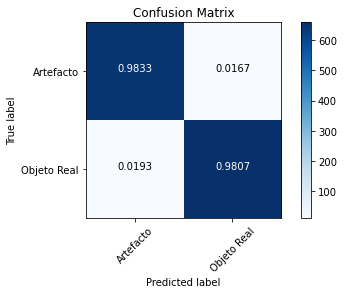

In [11]:
cm_plot_labels = ["Artefacto","Objeto Real"]
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,normalize=True,title="Confusion Matrix")

### Predicciones finales

In [12]:
data_test = np.load("unlab_test.pkl",allow_pickle=True,encoding='latin1')
data_test.keys()
imagenes_test_1 = data_test['sci_images'].reshape(-1,21,21,1)
imagenes_test_2 = data_test['temp_images'].reshape(-1,21,21,1)
imagenes_test_3 = data_test['SNR_images'].reshape(-1,21,21,1)
imagenes_test_4 = data_test['diff_images'].reshape(-1,21,21,1)

images = np.concatenate((imagenes_test_1,imagenes_test_2,imagenes_test_3, imagenes_test_4), axis=3)
print("shape nueva:",images.shape)


shape nueva: (1000, 21, 21, 4)


In [13]:
y_test = model.predict(images)
y_test = np.argmax(y_test,-1)
y_test


array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,

(array([507.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 493.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

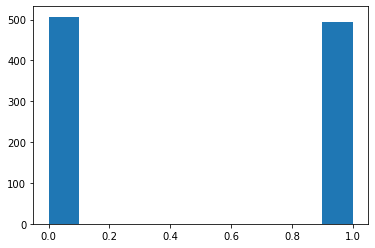

In [14]:
plt.hist(y_test)

In [15]:
data_out = {'ID': data_test['ID'], 'predicted':y_test}
df_out = pd.DataFrame(data_out)
df_out.to_csv("predicted.csv",index=False)